## PROJETO SPRINT - 8
* Neste projeto serão feitas análises para uma empresa com o propósito de otimizar suas despesas com marketing.
* Vamos avaliar como as pessoas usam o produto, quando elas começam a comprar, quanto dinheiro cada cliente traz para a empresa e quando as despesas serão cobertas. 
* Serão criadas Cohorts e avaliadas métricas como CAC, LTV, e ROI.



# Passo 1: 
* No passo 1 vamos importar as bibliotecas necessárias, baixar os data frames e fazer a otimização deles. 

In [135]:
# Importando as bibliotecas necessárias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [136]:
# Carregando os dados
df_visits= pd.read_csv('/datasets/visits_log_us.csv')
df_orders= pd.read_csv('/datasets/orders_log_us.csv')
df_costs= pd.read_csv('/datasets/costs_us.csv')

In [137]:
df_visits.head()

,Device,End Ts,Source Id,Start Ts,Uid
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214
4,desktop,2017-12-27 14:06:00,3,2017-12-27 14:06:00,9969694820036681168


In [138]:
# Nesta célula vamos conferir os tipos de dados da coluna e o tamanho do df, a fim de otimizar o mesmo. 
df_visits.info(memory_usage= 'deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359400 entries, 0 to 359399
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   Device     359400 non-null  object
 1   End Ts     359400 non-null  object
 2   Source Id  359400 non-null  int64 
 3   Start Ts   359400 non-null  object
 4   Uid        359400 non-null  uint64
dtypes: int64(1), object(3), uint64(1)
memory usage: 79.3 MB


* Seguimos otimizando o df_visits. 
* Vamos usar o método value_counts para conferir os valores unívocos
* Depois vamos converter o tipo object para categoy, visto que, o tipo categoy ocupa muito menos memória do que o tipo object. 
* As colunas 'End Ts' e 'Start Ts' também serão convertidas para o tipo correto usando o método to_datetime
* O df não possui valores ausentes.

In [139]:
# Conferindo os valores unívocos da coluna Device
df_visits['Device'].value_counts()

desktop    262567
touch       96833
Name: Device, dtype: int64

In [141]:
# como os valores são categorias dos dispositivos, vamos converter os tipos de dados de object para category
df_visits['Device']= df_visits['Device'].astype('category')
df_visits.info(memory_usage= 'deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359400 entries, 0 to 359399
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype   
---  ------     --------------   -----   
 0   Device     359400 non-null  category
 1   End Ts     359400 non-null  object  
 2   Source Id  359400 non-null  int64   
 3   Start Ts   359400 non-null  object  
 4   Uid        359400 non-null  uint64  
dtypes: category(1), int64(1), object(2), uint64(1)
memory usage: 57.9 MB


* Podemos notar que o tamanho do df_visits reduziu de 79,3 MB para 57,9. 
* Agora vamos converter os tipos de dados de data para o tipo correto.

In [142]:
# Convertendo as colunas 'Start Ts' e 'End Ts' para o tipo correto
df_visits['Start Ts']= pd.to_datetime(df_visits['Start Ts'], format= '%Y-%m-%d %H:%M:%S') 
df_visits['End Ts']= pd.to_datetime(df_visits['End Ts'], format= '%Y-%m-%d %H:%M:%S')
df_visits.head()

,Device,End Ts,Source Id,Start Ts,Uid
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214
4,desktop,2017-12-27 14:06:00,3,2017-12-27 14:06:00,9969694820036681168


In [143]:
df_visits.info(memory_usage= 'deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359400 entries, 0 to 359399
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   Device     359400 non-null  category      
 1   End Ts     359400 non-null  datetime64[ns]
 2   Source Id  359400 non-null  int64         
 3   Start Ts   359400 non-null  datetime64[ns]
 4   Uid        359400 non-null  uint64        
dtypes: category(1), datetime64[ns](2), int64(1), uint64(1)
memory usage: 11.3 MB


* Depois das modificaçãoes feitas, notamos que o tamanho final do df_visits é de 11,3 MB e seu tamanho inicial era de 79.3 MB, ou seja, ótimas mudanças para economia de memória.
* Existe a possibilidade de já baixar o df modificando os tipos das colunas, contudo, optei por fazer o passo a passo analisando cada coluna.
* Será feita a mesma análise para os outros dois data_frames.

In [144]:
df_orders.head()

,Buy Ts,Revenue,Uid
0,2017-06-01 00:10:00,17.00,10329302124590727494
1,2017-06-01 00:25:00,0.55,11627257723692907447
2,2017-06-01 00:27:00,0.37,17903680561304213844
3,2017-06-01 00:29:00,0.55,16109239769442553005
4,2017-06-01 07:58:00,0.37,14200605875248379450


In [145]:
# Conferindo o tamanho do df_orders e seus tipos de dados. 
df_orders.info(memory_usage= 'deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50415 entries, 0 to 50414
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Buy Ts   50415 non-null  object 
 1   Revenue  50415 non-null  float64
 2   Uid      50415 non-null  uint64 
dtypes: float64(1), object(1), uint64(1)
memory usage: 4.4 MB


In [146]:
# Para otimizar será feita a conversão da coluna Buy Ts para o tipo data usando pd.to_datetime
df_orders['Buy Ts']= pd.to_datetime(df_orders['Buy Ts'], format= '%Y-%m-%d %H:%M:%S')
df_orders.info(memory_usage= 'deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50415 entries, 0 to 50414
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   Buy Ts   50415 non-null  datetime64[ns]
 1   Revenue  50415 non-null  float64       
 2   Uid      50415 non-null  uint64        
dtypes: datetime64[ns](1), float64(1), uint64(1)
memory usage: 1.2 MB


* Notamos que o df_orders diminuiu de tamanho de 4.4 MB para 1.2 MB.
* O restante das colunas está com o tipo certo e não existem valores ausentes no df_orders

In [147]:
df_costs.head()

,source_id,dt,costs
0,1,2017-06-01,75.20
1,1,2017-06-02,62.25
2,1,2017-06-03,36.53
3,1,2017-06-04,55.00
4,1,2017-06-05,57.08


In [148]:
# Verificando o tamanho e os tipos de dados do df_costs
df_costs.info(memory_usage= 'deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2542 entries, 0 to 2541
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   source_id  2542 non-null   int64  
 1   dt         2542 non-null   object 
 2   costs      2542 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 206.2 KB


In [149]:
# Convertendo os tipo de dados da coluna dt para data
df_costs['dt']= pd.to_datetime(df_costs['dt'], format= '%Y-%m-%d')
df_costs.info(memory_usage= 'deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2542 entries, 0 to 2541
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   source_id  2542 non-null   int64         
 1   dt         2542 non-null   datetime64[ns]
 2   costs      2542 non-null   float64       
dtypes: datetime64[ns](1), float64(1), int64(1)
memory usage: 59.7 KB


* Após a otimização o tamanho do df_costs diminuiu mais do que a metade, indo de 206.2 MB para 59.7 MB
* O df_costs não possui nenhum valor ausente

In [150]:
# Nesta célula vamos seguir o padrão snake case e renomear as colunas do df_visits
new_col_names= []
for old_name in df_visits.columns:
    name_stripped= old_name.strip()
    name_lowred= name_stripped.lower()
    name_no_spaces= name_lowred.replace(' ', '_')
    new_col_names.append(name_no_spaces)

df_visits.columns= new_col_names    

In [151]:
df_visits.head()

,device,end_ts,source_id,start_ts,uid
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214
4,desktop,2017-12-27 14:06:00,3,2017-12-27 14:06:00,9969694820036681168


In [152]:
# Nesta célula vamos seguir o padrão snake case e renomear as colunas do df_orders
new_col_names= []
for old_name in df_orders.columns:
    name_stripped= old_name.strip()
    name_lowred= name_stripped.lower()
    name_no_spaces= name_lowred.replace(' ', '_')
    new_col_names.append(name_no_spaces)

df_orders.columns= new_col_names    

In [153]:
df_orders.head()

,buy_ts,revenue,uid
0,2017-06-01 00:10:00,17.00,10329302124590727494
1,2017-06-01 00:25:00,0.55,11627257723692907447
2,2017-06-01 00:27:00,0.37,17903680561304213844
3,2017-06-01 00:29:00,0.55,16109239769442553005
4,2017-06-01 07:58:00,0.37,14200605875248379450


In [154]:
# Nesta célula vamos seguir o padrão snake case e renomear as colunas do df_costs
new_col_names= []
for old_name in df_costs.columns:
    name_stripped= old_name.strip()
    name_lowred= name_stripped.lower()
    name_no_spaces= name_lowred.replace(' ', '_')
    new_col_names.append(name_no_spaces)

df_costs.columns= new_col_names   

In [155]:
df_costs.head()

,source_id,dt,costs
0,1,2017-06-01,75.20
1,1,2017-06-02,62.25
2,1,2017-06-03,36.53
3,1,2017-06-04,55.00
4,1,2017-06-05,57.08


# Passo 2. Fazendo relatórios e calculando métricas
 

## Passo 2.1: 
### Produto: 
* Quantas pessoas usam-no cada dia, semana e mês?
* Quantas sessões ocorrem por dia? (um usuário pode realizar várias sessões).
* Que comprimento tem cada sessão?
* Com que frequência os usuários voltam?


In [156]:
# 2.1.1: Quantas pessoas usam o site a cada mês? 
# Usando o método month para extrair o mês de cada registro de cada visita ao site
# Depois agrupando por mês e Uid para saber quantos usuários unívocos acessaram o site em cada mês
df_visits['month']= df_visits['start_ts'].dt.month
visit_per_month= df_visits.groupby('month').agg({'uid':'nunique'})
visit_per_month.head(12).T

month,1,2,3,4,5,6,7,8,9,10,11,12
uid,28716,28749,27473,21008,20701,13259,14183,11631,18975,29692,32797,31557


In [157]:
# Extraindo a semana da coluna 'Start Ts' e depois agrupando e contando quantas visitas temos por semana
df_visits['week']= df_visits['start_ts'].dt.week
visit_per_week = df_visits.groupby('week')['uid'].nunique().reset_index()
visit_per_week.head()

,week,uid
0,1,6918
1,2,6703
2,3,6972
3,4,7060
4,5,8111


In [158]:
# Extraindo o dia da coluna Start Ts e criando uma nova coluna chamada day_visit
# Agrupando pela nova coluna criada e contando os valores unívocos de usuários daquele dia
df_visits['day']= df_visits['start_ts'].dt.day
visit_per_day= df_visits.groupby('day')['uid'].nunique().reset_index()
visit_per_day.head()

,day,uid
0,1,9250
1,2,9794
2,3,10070
3,4,10184
4,5,10526


In [159]:
# Nesta célula criei extraí a data da coluna start_ts e agrupei o df pela data
df_visits['date'] = df_visits['start_ts'].dt.date
contagem_por_data= df_visits.groupby('date').count().reset_index()
contagem_por_data= contagem_por_data[['date', 'start_ts']]
contagem_por_data.columns = ['data', 'contagem'] 
contagem_por_data.head()

,data,contagem
0,2017-06-01,664
1,2017-06-02,658
2,2017-06-03,477
3,2017-06-04,510
4,2017-06-05,893


In [160]:
# Aqui selecionamos todas pessoas que fizeram sessões por dia e dividi pelos dias, dando uma média de 987
# pessoas por dia no site. 
total_ocorrencias = contagem_por_data['contagem'].sum()
n_dias_periodo = contagem_por_data['data'].nunique()
media_por_dia = int(total_ocorrencias / n_dias_periodo)
media_por_dia


987

In [161]:
#2.1.3: Que comprimento tem cada sessão?
# Subtraindo a coluna com o final da sessão pela coluna com o início da sessão
df_visits['duration_session']= (df_visits['end_ts'] - df_visits['start_ts']).dt.seconds
df_visits.head()

,device,end_ts,source_id,start_ts,uid,month,week,day,date,duration_session
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062,12,51,20,2017-12-20,1080
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740,2,8,19,2018-02-19,1680
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527,7,26,1,2017-07-01,0
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214,5,20,20,2018-05-20,1440
4,desktop,2017-12-27 14:06:00,3,2017-12-27 14:06:00,9969694820036681168,12,52,27,2017-12-27,0


In [162]:
# Duração média das sessões
mean_session= round(df_visits['duration_session'].mean())                 
print(f'A duração média das sessões é de',mean_session,'segundos')


A duração média das sessões é de 644 segundos


In [163]:
df_visits.head()

,device,end_ts,source_id,start_ts,uid,month,week,day,date,duration_session
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062,12,51,20,2017-12-20,1080
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740,2,8,19,2018-02-19,1680
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527,7,26,1,2017-07-01,0
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214,5,20,20,2018-05-20,1440
4,desktop,2017-12-27 14:06:00,3,2017-12-27 14:06:00,9969694820036681168,12,52,27,2017-12-27,0


In [164]:
#2.1.4: Com que frequência os usuários voltam?
# Para saber isso vou extrair o número de usuários ativos por dia e semana, depois vou calcular a
# taxa de retenção para saber com que frequência os usuários voltam
dau_total= int(df_visits.groupby('day').agg({'uid':'nunique'}).mean())
dau_total

10241

In [165]:
# Extraindo o número de usuários ativos semanalmente
wau_total= int(df_visits.groupby('week').agg({'uid':'nunique'}).mean())
wau_total

5825

In [166]:
# Mensagem ao corretor: Estou com dúvidas sobre esse valor!!!!
# Para calcular a taxa de retenção semanal vamos dividir o dau_total pelo wau_total
ret_week= round((dau_total / wau_total * 100))
print(f'A taxa de retenção semanal é de:',ret_week,'%')

A taxa de retenção semanal é de: 176 %


In [167]:
# Agora vamos calcular a taxa de retenção mensal
# Calculando os usuários ativos mensais, e depois calculando a retenção mensal
mau_total= int(df_visits.groupby('month').agg({'uid':'nunique'}).mean())
ret_month=round((wau_total / mau_total * 100))
print(f'A taxa de retenção mensal é de:',ret_month,'%')

A taxa de retenção mensal é de: 25 %


In [168]:
mau_total= int(df_visits.groupby('month').agg({'uid':'nunique'}).mean())
mau_total

23228

In [169]:
df_visits.head()


,device,end_ts,source_id,start_ts,uid,month,week,day,date,duration_session
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062,12,51,20,2017-12-20,1080
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740,2,8,19,2018-02-19,1680
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527,7,26,1,2017-07-01,0
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214,5,20,20,2018-05-20,1440
4,desktop,2017-12-27 14:06:00,3,2017-12-27 14:06:00,9969694820036681168,12,52,27,2017-12-27,0


In [196]:
df_orders.head()

,buy_ts,revenue,uid
0,2017-06-01 00:10:00,17.00,10329302124590727494
1,2017-06-01 00:25:00,0.55,11627257723692907447
2,2017-06-01 00:27:00,0.37,17903680561304213844
3,2017-06-01 00:29:00,0.55,16109239769442553005
4,2017-06-01 07:58:00,0.37,14200605875248379450


* Nas células seguintes vamos criar uma cohorte com os usuários que fizeram sua primeira compra.

In [197]:
# Nesta célula foi extraído a data da primeira compra para cada usuário e essa coluna foi renomeada como 'first_purchase'
first_orders_df = df_orders.groupby('uid').agg({'buy_ts': 'min'}).reset_index().rename(columns={'buy_ts': 'first_purchase'})
first_orders_df.head()

,uid,first_purchase
0,313578113262317,2018-01-03 21:51:00
1,1575281904278712,2017-06-03 10:13:00
2,2429014661409475,2017-10-11 18:33:00
3,2464366381792757,2018-01-28 15:54:00
4,2551852515556206,2017-11-24 10:14:00


In [198]:
# Nesta célula foi mesclado o df com a data da primeira compra com o df_orders que contêm todas as compras
first_orders_df= pd.merge(first_orders_df, df_orders, on= 'uid' )
first_orders_df.head()

,uid,first_purchase,buy_ts,revenue
0,313578113262317,2018-01-03 21:51:00,2018-01-03 21:51:00,0.55
1,1575281904278712,2017-06-03 10:13:00,2017-06-03 10:13:00,1.22
2,1575281904278712,2017-06-03 10:13:00,2017-06-03 17:39:00,1.83
3,2429014661409475,2017-10-11 18:33:00,2017-10-11 18:33:00,73.33
4,2464366381792757,2018-01-28 15:54:00,2018-01-28 15:54:00,2.44


In [199]:
# Nesta célula usei o método astype'datetime64[M]' para extrair somente os meses das colunas com o primeiro pedido e com todos os pedidos
first_orders_df['first_order_month']= first_orders_df['first_purchase'].astype('datetime64[M]')
first_orders_df['order_month']= first_orders_df['buy_ts'].astype('datetime64[M]')
first_orders_df.head()

,uid,first_purchase,buy_ts,revenue,first_order_month,order_month
0,313578113262317,2018-01-03 21:51:00,2018-01-03 21:51:00,0.55,2018-01-01,2018-01-01
1,1575281904278712,2017-06-03 10:13:00,2017-06-03 10:13:00,1.22,2017-06-01,2017-06-01
2,1575281904278712,2017-06-03 10:13:00,2017-06-03 17:39:00,1.83,2017-06-01,2017-06-01
3,2429014661409475,2017-10-11 18:33:00,2017-10-11 18:33:00,73.33,2017-10-01,2017-10-01
4,2464366381792757,2018-01-28 15:54:00,2018-01-28 15:54:00,2.44,2018-01-01,2018-01-01


In [200]:
# Nesta célula foi agrupado o df para analisarmos as métricas da coorte, como receita e quantidade de usuários que continuaram a usar o site
cohort= first_orders_df.groupby('first_order_month').agg({'uid':'nunique', 'revenue':'sum'}).rename(columns={'uid':'numbers_of_users', 'revenue':'revenue_by_cohort'})
cohort.head()

,numbers_of_users,revenue_by_cohort
first_order_month,,
2017-06-01,2023,24031.69
2017-07-01,1923,16127.92
2017-08-01,1370,11606.26
2017-09-01,2581,34676.32
2017-10-01,4340,27603.45


In [201]:
# Nesta célula foi criada uma tabela dinâmica mostrando a quantidade de usuários ativos nos meses subsequentes da primeira compra. 
tabela= first_orders_df.pivot_table(index='first_order_month',
                           columns= 'order_month',
                           values='uid',
                           aggfunc= 'nunique')
tabela.fillna('')


order_month,2017-06-01,2017-07-01,2017-08-01,2017-09-01,2017-10-01,2017-11-01,2017-12-01,2018-01-01,2018-02-01,2018-03-01,2018-04-01,2018-05-01,2018-06-01
first_order_month,,,,,,,,,,,,,
2017-06-01,2023.0,61.0,50.0,54.0,88.0,67.0,62.0,47.0,58.0,45.0,45.0,53.0,
2017-07-01,,1923.0,52.0,57.0,64.0,49.0,38.0,36.0,39.0,42.0,22.0,26.0,
2017-08-01,,,1370.0,58.0,53.0,44.0,40.0,32.0,30.0,44.0,19.0,31.0,
2017-09-01,,,,2581.0,130.0,100.0,74.0,52.0,64.0,66.0,37.0,43.0,
2017-10-01,,,,,4340.0,206.0,123.0,92.0,93.0,72.0,56.0,67.0,
2017-11-01,,,,,,4081.0,222.0,120.0,106.0,81.0,48.0,62.0,
2017-12-01,,,,,,,4383.0,146.0,103.0,97.0,50.0,63.0,
2018-01-01,,,,,,,,3373.0,114.0,83.0,43.0,45.0,
2018-02-01,,,,,,,,,3651.0,118.0,58.0,39.0,


In [202]:
first_orders_df.head()

,uid,first_purchase,buy_ts,revenue,first_order_month,order_month
0,313578113262317,2018-01-03 21:51:00,2018-01-03 21:51:00,0.55,2018-01-01,2018-01-01
1,1575281904278712,2017-06-03 10:13:00,2017-06-03 10:13:00,1.22,2017-06-01,2017-06-01
2,1575281904278712,2017-06-03 10:13:00,2017-06-03 17:39:00,1.83,2017-06-01,2017-06-01
3,2429014661409475,2017-10-11 18:33:00,2017-10-11 18:33:00,73.33,2017-10-01,2017-10-01
4,2464366381792757,2018-01-28 15:54:00,2018-01-28 15:54:00,2.44,2018-01-01,2018-01-01


In [203]:
# Nesta célula podemos ver a receita média por usuário, por cohort
orders_grouped_by_cohorts = first_orders_df.groupby(['first_order_month', 'order_month']).agg({'revenue': 'sum', 'uid': 'nunique'})
orders_grouped_by_cohorts['revenue_per_user']= orders_grouped_by_cohorts['revenue'] / orders_grouped_by_cohorts['uid']
orders_grouped_by_cohorts.head()

revenue   uid  revenue_per_user
first_order_month order_month                                 
2017-06-01        2017-06-01   9557.49  2023          4.724414
                  2017-07-01    981.82    61         16.095410
                  2017-08-01    885.34    50         17.706800
                  2017-09-01   1931.30    54         35.764815
                  2017-10-01   2068.58    88         23.506591

In [205]:
# Nesta célula abaixo podemos ver como a receita média por usuário de cada cohort mudou de acordo com o tempo.
tabela_2= orders_grouped_by_cohorts.pivot_table(index='first_order_month',
                                     columns='order_month',
                                     values='revenue_per_user',
                                     aggfunc='mean')
tabela_2.fillna('')

order_month,2017-06-01,2017-07-01,2017-08-01,2017-09-01,2017-10-01,2017-11-01,2017-12-01,2018-01-01,2018-02-01,2018-03-01,2018-04-01,2018-05-01,2018-06-01
first_order_month,,,,,,,,,,,,,
2017-06-01,4.724414,16.09541,17.7068,35.764815,23.506591,22.207761,31.011935,25.033191,19.29569,27.233556,25.681333,9.804151,
2017-07-01,,6.010218,12.396346,21.035965,10.786094,6.938163,7.896842,6.421111,6.992821,7.382143,12.861818,11.513846,
2017-08-01,,,5.276518,11.148793,11.851321,12.182955,16.92125,12.139063,9.620333,12.610455,21.07,8.307419,
2017-09-01,,,,5.644529,22.188385,13.4452,138.669189,19.881538,26.095,27.437121,16.961351,11.044651,
2017-10-01,,,,,5.003733,11.287427,6.753252,7.413152,7.072796,7.255139,6.573214,7.479701,
2017-11-01,,,,,,5.154683,7.339054,6.786583,12.51066,7.457284,4.580833,7.564839,
2017-12-01,,,,,,,4.738191,7.816575,39.366019,48.135052,27.4314,23.518413,
2018-01-01,,,,,,,,4.135636,8.721228,12.365542,11.199767,4.699556,
2018-02-01,,,,,,,,,4.156987,8.61,4.942414,6.941026,


In [206]:
# Calcula a receita média por cohort
median_purchase = first_orders_df.groupby(['first_order_month','order_month'])['revenue'].median().reset_index()

# Calcula o intervalo entre a compra atual e primeira compra 
median_purchase['cohort'] = ((median_purchase['order_month'] - median_purchase['first_order_month']) / np.timedelta64(1,'M')).round()
median_purchase.head()

,first_order_month,order_month,revenue,cohort
0,2017-06-01,2017-06-01,2.44,0.0
1,2017-06-01,2017-07-01,3.60,1.0
2,2017-06-01,2017-08-01,3.05,2.0
3,2017-06-01,2017-09-01,4.28,3.0
4,2017-06-01,2017-10-01,3.30,4.0


In [207]:
median_purchase_piv=median_purchase.pivot_table(
    index='first_order_month', 
    columns='cohort', 
    values='revenue', 
    aggfunc='mean'
)
median_purchase_piv.round(2).fillna('')

cohort,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,11.0
first_order_month,,,,,,,,,,,,
2017-06-01,2.44,3.6,3.05,4.28,3.3,2.44,3.05,3.05,3.39,3.67,4.28,1.83
2017-07-01,3.05,2.81,3.85,3.05,2.38,2.44,2.44,3.58,2.26,4.64,3.67,
2017-08-01,2.75,3.79,3.67,4.28,4.58,3.67,3.05,3.05,4.73,3.42,,
2017-09-01,2.44,4.89,2.93,5.53,2.93,4.89,3.4,3.48,3.91,,,
2017-10-01,2.44,2.75,2.69,2.72,3.3,2.62,2.38,2.57,,,,
2017-11-01,2.44,1.95,1.83,3.18,2.09,2.44,3.12,,,,,
2017-12-01,2.66,2.41,2.96,3.05,2.36,2.44,,,,,,
2018-01-01,2.44,2.44,2.44,3.05,2.08,,,,,,,
2018-02-01,2.44,2.44,2.33,2.26,,,,,,,,


In [208]:
orders_grouped_by_cohorts.head()

revenue   uid  revenue_per_user
first_order_month order_month                                 
2017-06-01        2017-06-01   9557.49  2023          4.724414
                  2017-07-01    981.82    61         16.095410
                  2017-08-01    885.34    50         17.706800
                  2017-09-01   1931.30    54         35.764815
                  2017-10-01   2068.58    88         23.506591

In [209]:
orders_grouped_by_cohorts= orders_grouped_by_cohorts.reset_index()
orders_grouped_by_cohorts.head()

,first_order_month,order_month,revenue,uid,revenue_per_user
0,2017-06-01,2017-06-01,9557.49,2023,4.724414
1,2017-06-01,2017-07-01,981.82,61,16.095410
2,2017-06-01,2017-08-01,885.34,50,17.706800
3,2017-06-01,2017-09-01,1931.30,54,35.764815
4,2017-06-01,2017-10-01,2068.58,88,23.506591


In [210]:
# Nesta coluna calculamos o tempo de vida de cada coorte.
orders_grouped_by_cohorts['cohort_lifetime']= orders_grouped_by_cohorts['order_month'] - orders_grouped_by_cohorts['first_order_month']
orders_grouped_by_cohorts['cohort_lifetime']= orders_grouped_by_cohorts['cohort_lifetime'] / np.timedelta64(1, 'M')
orders_grouped_by_cohorts['cohort_lifetime']= (orders_grouped_by_cohorts['cohort_lifetime'].round().astype('int'))
orders_grouped_by_cohorts.head()

,first_order_month,order_month,revenue,uid,revenue_per_user,cohort_lifetime
0,2017-06-01,2017-06-01,9557.49,2023,4.724414,0
1,2017-06-01,2017-07-01,981.82,61,16.095410,1
2,2017-06-01,2017-08-01,885.34,50,17.706800,2
3,2017-06-01,2017-09-01,1931.30,54,35.764815,3
4,2017-06-01,2017-10-01,2068.58,88,23.506591,4


In [211]:
# Nesta célula descobri a quantidade de usuários ativos em cada tempo de vida
cohorts_active= orders_grouped_by_cohorts.groupby(['first_order_month', 'cohort_lifetime']).agg({'uid':'sum'}).reset_index()
cohorts_active.head()

,first_order_month,cohort_lifetime,uid
0,2017-06-01,0,2023
1,2017-06-01,1,61
2,2017-06-01,2,50
3,2017-06-01,3,54
4,2017-06-01,4,88


In [212]:
cohorts_active

,first_order_month,cohort_lifetime,uid
0,2017-06-01,0,2023
1,2017-06-01,1,61
2,2017-06-01,2,50
3,2017-06-01,3,54
4,2017-06-01,4,88
...,...,...,...
74,2018-03-01,2,58
75,2018-04-01,0,2276
76,2018-04-01,1,69
77,2018-05-01,0,2988


In [213]:
# Nesta célula eu extraí a quantidade de usuários ativos em cada tempo de vida das coortes.
initial_users_count= cohorts_active[cohorts_active['cohort_lifetime']==0][['first_order_month','uid']]
initial_users_count= initial_users_count.rename(columns={'uid':'cohort_users'})
initial_users_count.head()

,first_order_month,cohort_users
0,2017-06-01,2023
12,2017-07-01,1923
23,2017-08-01,1370
33,2017-09-01,2581
42,2017-10-01,4340


In [214]:
# Nesta célula mesclei o df com as atividades da coorte com o df com a quantidade de usuários ativos
cohorts_final= pd.merge(cohorts_active, initial_users_count, on='first_order_month')
cohorts_final.head()

,first_order_month,cohort_lifetime,uid,cohort_users
0,2017-06-01,0,2023,2023
1,2017-06-01,1,61,2023
2,2017-06-01,2,50,2023
3,2017-06-01,3,54,2023
4,2017-06-01,4,88,2023


In [215]:
# Calculando a taxa de retenção
cohorts_final['retention']= cohorts_final['uid'] / cohorts_final['cohort_users']
cohorts_final.head()

,first_order_month,cohort_lifetime,uid,cohort_users,retention
0,2017-06-01,0,2023,2023,1.000000
1,2017-06-01,1,61,2023,0.030153
2,2017-06-01,2,50,2023,0.024716
3,2017-06-01,3,54,2023,0.026693
4,2017-06-01,4,88,2023,0.043500


In [216]:
# Nesta tabela consta os índices de retenção para cada tempo de vida
cohorts_final.pivot_table(index= 'first_order_month',
                                          columns= 'cohort_lifetime',
                                          values= 'retention',
                                          aggfunc= 'sum')


cohort_lifetime,0,1,2,3,4,5,6,7,8,9,10,11
first_order_month,,,,,,,,,,,,
2017-06-01,1.0,0.030153,0.024716,0.026693,0.043500,0.033119,0.030648,0.023233,0.028670,0.022244,0.022244,0.026199
2017-07-01,1.0,0.027041,0.029641,0.033281,0.025481,0.019761,0.018721,0.020281,0.021841,0.011440,0.013521,NaN
2017-08-01,1.0,0.042336,0.038686,0.032117,0.029197,0.023358,0.021898,0.032117,0.013869,0.022628,NaN,NaN
2017-09-01,1.0,0.050368,0.038745,0.028671,0.020147,0.024797,0.025571,0.014336,0.016660,NaN,NaN,NaN
2017-10-01,1.0,0.047465,0.028341,0.021198,0.021429,0.016590,0.012903,0.015438,NaN,NaN,NaN,NaN
2017-11-01,1.0,0.054398,0.029405,0.025974,0.019848,0.011762,0.015192,NaN,NaN,NaN,NaN,NaN
2017-12-01,1.0,0.033311,0.023500,0.022131,0.011408,0.014374,NaN,NaN,NaN,NaN,NaN,NaN
2018-01-01,1.0,0.033798,0.024607,0.012748,0.013341,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-02-01,1.0,0.032320,0.015886,0.010682,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Passo 2.2 - Vendas:
 * Quando as pessoas começam a comprar? (Na análise de KPIs, nós geralmente estamos interessados em saber o período de tempo entre o registro e a conversão – quando o usuário se torna um cliente. Por exemplo, se o registro e a primeira compra de um usuário ocorrem no mesmo dia, ele pode encaixar na categoria de Conversão 0d. Se a compra é realizada no dia seguinte, isso será a Conversão 1d. Você pode usar qualquer abordagem que permita comparar as conversões de diferentes coortes, para que você possa determinar qual coorte ou canal de marketing tem a maior eficiência)
* Quantos pedidos os clientes fazem durante um determinado período de tempo?
* Qual é o volume médio de uma compra?
* Quanto dinheiro eles trazem para a empresa (LTV)?


In [217]:
# Passo 2.2.1: Quando as pessoas começaram a comprar?
#Quando as pessoas começaram a comprar? Farei cortes desde a primeira sessão até a primeira compra
# A primeira coisa é mesclar o df_visitis com o df_orders usando merge
df_aux1= pd.merge(df_visits, df_orders, on='uid')
df_aux1.head()

,device,end_ts,source_id,start_ts,uid,month,week,day,date,duration_session,buy_ts,revenue
0,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214,5,20,20,2018-05-20,1440,2018-03-09 20:25:00,2.33
1,desktop,2018-03-09 20:33:00,4,2018-03-09 20:05:00,16174680259334210214,3,10,9,2018-03-09,1680,2018-03-09 20:25:00,2.33
2,desktop,2017-09-03 21:36:00,5,2017-09-03 21:35:00,16007536194108375387,9,35,3,2017-09-03,60,2017-09-04 12:46:00,2.44
3,desktop,2017-09-03 21:36:00,5,2017-09-03 21:35:00,16007536194108375387,9,35,3,2017-09-03,60,2017-10-28 00:01:00,1.53
4,desktop,2017-09-03 21:36:00,5,2017-09-03 21:35:00,16007536194108375387,9,35,3,2017-09-03,60,2017-10-28 19:16:00,1.53


In [218]:
#Extraindo a data do primeiro acesso ao site por usuário e alterando seu nome para 'month_first_acess'
month_first_acess = df_aux1.groupby('uid')['start_ts'].min()
month_first_acess.name= 'date_first_acess'
month_first_acess.head()

uid
313578113262317    2017-09-18 22:49:00
1575281904278712   2017-06-03 10:13:00
2429014661409475   2017-10-11 17:14:00
2464366381792757   2018-01-27 20:10:00
2551852515556206   2017-11-24 10:14:00
Name: date_first_acess, dtype: datetime64[ns]

In [219]:
# Juntando o series com o mês do  primeiro acesso com o df_aux1 
df_aux2= pd.merge(df_aux1, month_first_acess, on='uid')
df_aux2.head()

,device,end_ts,source_id,start_ts,uid,month,week,day,date,duration_session,buy_ts,revenue,date_first_acess
0,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214,5,20,20,2018-05-20,1440,2018-03-09 20:25:00,2.33,2018-03-09 20:05:00
1,desktop,2018-03-09 20:33:00,4,2018-03-09 20:05:00,16174680259334210214,3,10,9,2018-03-09,1680,2018-03-09 20:25:00,2.33,2018-03-09 20:05:00
2,desktop,2017-09-03 21:36:00,5,2017-09-03 21:35:00,16007536194108375387,9,35,3,2017-09-03,60,2017-09-04 12:46:00,2.44,2017-09-03 21:35:00
3,desktop,2017-09-03 21:36:00,5,2017-09-03 21:35:00,16007536194108375387,9,35,3,2017-09-03,60,2017-10-28 00:01:00,1.53,2017-09-03 21:35:00
4,desktop,2017-09-03 21:36:00,5,2017-09-03 21:35:00,16007536194108375387,9,35,3,2017-09-03,60,2017-10-28 19:16:00,1.53,2017-09-03 21:35:00


In [220]:
# Agora vou usar o df_aux2 e extrair a data da primeira compra
month_first_order = df_aux1.groupby('uid')['buy_ts'].min()
month_first_order.name= 'date_first_order'
month_first_order.head()

uid
313578113262317    2018-01-03 21:51:00
1575281904278712   2017-06-03 10:13:00
2429014661409475   2017-10-11 18:33:00
2464366381792757   2018-01-28 15:54:00
2551852515556206   2017-11-24 10:14:00
Name: date_first_order, dtype: datetime64[ns]

In [221]:
# Nesta célula criei um df completo com as datas da primeira compra e as datas do primeiro acesso de cada usuário
# Usei o método meerge para mesclar os dois df
df_aux3= pd.merge(df_aux2, month_first_order, on='uid')
df_aux3.head()

,device,end_ts,source_id,start_ts,uid,month,week,day,date,duration_session,buy_ts,revenue,date_first_acess,date_first_order
0,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214,5,20,20,2018-05-20,1440,2018-03-09 20:25:00,2.33,2018-03-09 20:05:00,2018-03-09 20:25:00
1,desktop,2018-03-09 20:33:00,4,2018-03-09 20:05:00,16174680259334210214,3,10,9,2018-03-09,1680,2018-03-09 20:25:00,2.33,2018-03-09 20:05:00,2018-03-09 20:25:00
2,desktop,2017-09-03 21:36:00,5,2017-09-03 21:35:00,16007536194108375387,9,35,3,2017-09-03,60,2017-09-04 12:46:00,2.44,2017-09-03 21:35:00,2017-09-04 12:46:00
3,desktop,2017-09-03 21:36:00,5,2017-09-03 21:35:00,16007536194108375387,9,35,3,2017-09-03,60,2017-10-28 00:01:00,1.53,2017-09-03 21:35:00,2017-09-04 12:46:00
4,desktop,2017-09-03 21:36:00,5,2017-09-03 21:35:00,16007536194108375387,9,35,3,2017-09-03,60,2017-10-28 19:16:00,1.53,2017-09-03 21:35:00,2017-09-04 12:46:00


In [222]:
# Nesta coluna vou calcular o tempo passado entre o primeiro acesso e a primeira compra
# Depois vou converter a coluna 'dif_ind_days' para dias e saber a diferença 
df_aux3['dif_ind_days']= (df_aux3['date_first_order'] - df_aux3['date_first_acess']).dt.days
df_aux3.head()

,device,end_ts,source_id,start_ts,uid,month,week,day,date,duration_session,buy_ts,revenue,date_first_acess,date_first_order,dif_ind_days
0,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214,5,20,20,2018-05-20,1440,2018-03-09 20:25:00,2.33,2018-03-09 20:05:00,2018-03-09 20:25:00,0
1,desktop,2018-03-09 20:33:00,4,2018-03-09 20:05:00,16174680259334210214,3,10,9,2018-03-09,1680,2018-03-09 20:25:00,2.33,2018-03-09 20:05:00,2018-03-09 20:25:00,0
2,desktop,2017-09-03 21:36:00,5,2017-09-03 21:35:00,16007536194108375387,9,35,3,2017-09-03,60,2017-09-04 12:46:00,2.44,2017-09-03 21:35:00,2017-09-04 12:46:00,0
3,desktop,2017-09-03 21:36:00,5,2017-09-03 21:35:00,16007536194108375387,9,35,3,2017-09-03,60,2017-10-28 00:01:00,1.53,2017-09-03 21:35:00,2017-09-04 12:46:00,0
4,desktop,2017-09-03 21:36:00,5,2017-09-03 21:35:00,16007536194108375387,9,35,3,2017-09-03,60,2017-10-28 19:16:00,1.53,2017-09-03 21:35:00,2017-09-04 12:46:00,0


Text(0.5, 0, 'Dias corridos entre a primeira sessão e a primeira compra')

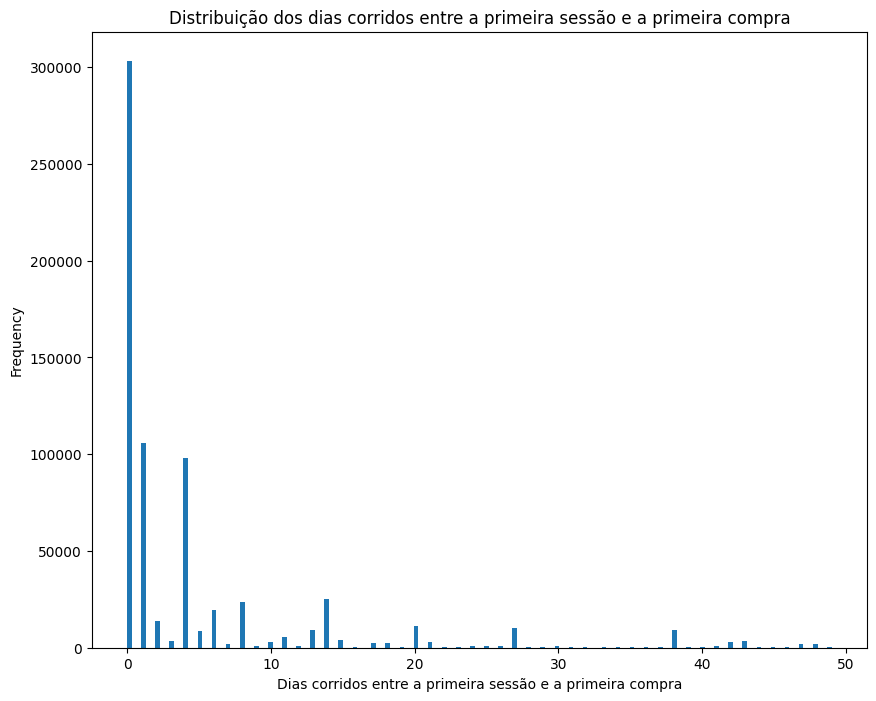

In [223]:
# Plotando um Histrograma para visualizar como está distribuída a coluna que mostra quantos dias
# cada pessoa leva para comprar a partir da primeira sessão. 
# Conseidere 0 quando a pessoa fez a compra no mesmo dia que fez sua primeira sessão.
df_aux3[df_aux3['dif_ind_days'] < 50]['dif_ind_days'].plot.hist(bins= 150, figsize=(10, 8))
plt.title('Distribuição dos dias corridos entre a primeira sessão e a primeira compra')
plt.xlabel('Dias corridos entre a primeira sessão e a primeira compra')

* Na célula acima foi criado uma distribuição para visualizar a frequência dos usuários desde seu primeiro acesso até sua primeira compra.
* Nota-se que a maioria dos usuários faz sua primeira compra em até 9 dias após seu primeiro acesso.
* Recomenda-se um trabalho de marketing forte em até 20 dias após o primeiro acesso, após isso uma possível compra torna-se improvável.  

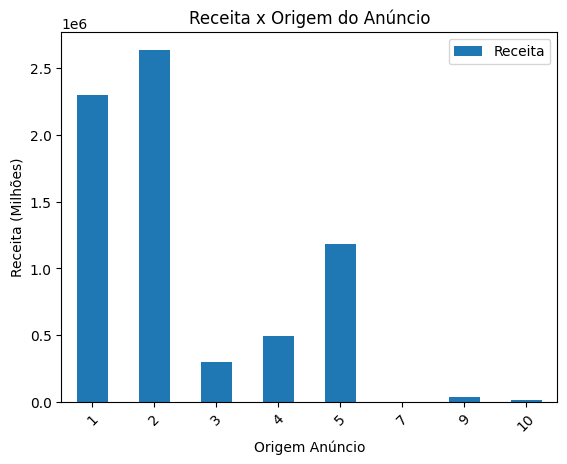

In [224]:
# Criando um gráfico de barras para visualizar quais canais de marketing trazem mais receitas.
pd.options.display.float_format = '{:.2f}'.format
rec_per_chanel= df_aux3.groupby('source_id')['revenue'].sum().reset_index()  
rec_per_chanel.plot(kind='bar', x='source_id',title= 'Receita x Origem do Anúncio',
                   xlabel= 'Origem Anúncio', ylabel= 'Receita (Milhões)',rot= 45,legend= False)
plt.legend(['Receita'])
plt.show()


* Na célular acima foi criado um gráfico de barras para melhor visualização da comparação entre receita e origem dos anúncios. 
* Fica evidente que basicamente 3 canais de marketing trazem quase toda a receita da empresa.

In [225]:
# Nesta célula extraí a receita média por usuário. 
# Deixei os 5 usuários que tiveram as maiores receitas médias durante todo o período. 
rec_by_user= df_aux3.groupby('uid')['revenue'].mean().reset_index().sort_values(by= 'revenue',
                                                                                ascending= False)
rec_by_user.head()

,uid,revenue
22073,11149926373378902217,657.47
31999,16152080406371512880,550.00
23877,12069004609949546307,407.00
18462,9352364483376991844,201.67
1667,838624912253662121,195.55


# Passo 2.2.4: Quanto dinheiro eles trazem para a empresa (LTV)?
* Para calcular o LTV consideramos o lucro bruto de um consumidor por período. 
* Vamos considerar o lucro bruto como sendo sua receita menos o valor gasto por anúncio para trazê-lo.


In [226]:
# Nesta célula notamos que o mês que teve o primeiro pedido foi 06 de 2017.
df_aux3['buy_ts'].describe()

count                  761807
unique                  45991
top       2017-11-27 12:41:00
freq                      761
first     2017-06-01 00:10:00
last      2018-06-01 00:02:00
Name: buy_ts, dtype: object

In [227]:
# Nesta célula notamos que o mês que iniciaram os gastos com marketing foi 06 de 2017 também.
df_costs['dt'].describe()

count                    2542
unique                    364
top       2017-06-28 00:00:00
freq                        7
first     2017-06-01 00:00:00
last      2018-05-31 00:00:00
Name: dt, dtype: object

In [228]:
# Como vou fazer coortes mensais, eu estou extraindo o mês da coluna 'dt' que contêm os gastos.
df_costs['dt']= df_costs['dt'].astype('datetime64[M]')

In [229]:
# Como pretendo fazer coortes mensais, vou extrair o mês da coluna com os pedidos
df_aux3['date_first_order']= df_aux3['date_first_order'].astype('datetime64[M]')
df_aux3.head()

,device,end_ts,source_id,start_ts,uid,month,week,day,date,duration_session,buy_ts,revenue,date_first_acess,date_first_order,dif_ind_days
0,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214,5,20,20,2018-05-20,1440,2018-03-09 20:25:00,2.33,2018-03-09 20:05:00,2018-03-01,0
1,desktop,2018-03-09 20:33:00,4,2018-03-09 20:05:00,16174680259334210214,3,10,9,2018-03-09,1680,2018-03-09 20:25:00,2.33,2018-03-09 20:05:00,2018-03-01,0
2,desktop,2017-09-03 21:36:00,5,2017-09-03 21:35:00,16007536194108375387,9,35,3,2017-09-03,60,2017-09-04 12:46:00,2.44,2017-09-03 21:35:00,2017-09-01,0
3,desktop,2017-09-03 21:36:00,5,2017-09-03 21:35:00,16007536194108375387,9,35,3,2017-09-03,60,2017-10-28 00:01:00,1.53,2017-09-03 21:35:00,2017-09-01,0
4,desktop,2017-09-03 21:36:00,5,2017-09-03 21:35:00,16007536194108375387,9,35,3,2017-09-03,60,2017-10-28 19:16:00,1.53,2017-09-03 21:35:00,2017-09-01,0


In [230]:
# Como pretendo fazer coortes mensais, vou extrair o mês da primeira compra. 
df_aux3['buy_ts']= df_aux3['buy_ts'].astype('datetime64[M]')
df_aux3.head()

,device,end_ts,source_id,start_ts,uid,month,week,day,date,duration_session,buy_ts,revenue,date_first_acess,date_first_order,dif_ind_days
0,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214,5,20,20,2018-05-20,1440,2018-03-01,2.33,2018-03-09 20:05:00,2018-03-01,0
1,desktop,2018-03-09 20:33:00,4,2018-03-09 20:05:00,16174680259334210214,3,10,9,2018-03-09,1680,2018-03-01,2.33,2018-03-09 20:05:00,2018-03-01,0
2,desktop,2017-09-03 21:36:00,5,2017-09-03 21:35:00,16007536194108375387,9,35,3,2017-09-03,60,2017-09-01,2.44,2017-09-03 21:35:00,2017-09-01,0
3,desktop,2017-09-03 21:36:00,5,2017-09-03 21:35:00,16007536194108375387,9,35,3,2017-09-03,60,2017-10-01,1.53,2017-09-03 21:35:00,2017-09-01,0
4,desktop,2017-09-03 21:36:00,5,2017-09-03 21:35:00,16007536194108375387,9,35,3,2017-09-03,60,2017-10-01,1.53,2017-09-03 21:35:00,2017-09-01,0


In [231]:
# Calculando a quantidade de clientes novos para cada mês.
cohort_sizes= df_aux3.groupby('date_first_order').agg({'uid':'nunique'}).reset_index()
cohort_sizes.head()

,date_first_order,uid
0,2017-06-01,2023
1,2017-07-01,1923
2,2017-08-01,1370
3,2017-09-01,2581
4,2017-10-01,4340


In [232]:
# Nesta célula agreguei os dados dos clientes que fizeram a primeira compra no primeiro mês, e qual a 
# receita que eles tiveram nos meses subsequentes. 
cohorts= df_aux3.groupby(['date_first_order','buy_ts']).agg({'revenue':'sum'}).reset_index()
cohorts.head()

,date_first_order,buy_ts,revenue
0,2017-06-01,2017-06-01,148121.29
1,2017-06-01,2017-07-01,155869.55
2,2017-06-01,2017-08-01,114898.83
3,2017-06-01,2017-09-01,374481.76
4,2017-06-01,2017-10-01,351833.14


In [233]:
# Agora vou colocar o número de usuários que fizeram sua primeira compra em cada mês na tabela com a coorte
report= pd.merge(cohort_sizes, cohorts, on='date_first_order')
report= report.rename(columns={'uid':'n_buyers'})
report.head()

,date_first_order,n_buyers,buy_ts,revenue
0,2017-06-01,2023,2017-06-01,148121.29
1,2017-06-01,2023,2017-07-01,155869.55
2,2017-06-01,2023,2017-08-01,114898.83
3,2017-06-01,2023,2017-09-01,374481.76
4,2017-06-01,2023,2017-10-01,351833.14


In [234]:
# Nesta célula calculei o custo por usuário, ou seja, quanto foi gasto para aquele usuário ir até o site

df_visits['start_ts'] = pd.to_datetime(df_visits['start_ts'])
df_visits['start_ts_date'] = pd.to_datetime(df_visits['start_ts'].dt.date)


total_users_by_day = df_visits.groupby(['source_id', 'start_ts_date'])['uid'].nunique().reset_index()
total_users_by_day = total_users_by_day.rename(columns={'uid': 'total_visits'})

df_costs['dt'] = pd.to_datetime(df_costs['dt'])

df_est_custo =pd.merge(df_costs, total_users_by_day, left_on=['source_id', 'dt'], right_on=['source_id', 'start_ts_date'])
df_est_custo['custo_medio_por_usuario'] = df_est_custo['costs'] / df_est_custo['total_visits']


df_aux5= pd.merge(df_visits, df_est_custo, on=['source_id', 'start_ts_date'], how='left')
df_aux5.head()

,device,end_ts,source_id,start_ts,uid,month,week,day,date,duration_session,start_ts_date,dt,costs,total_visits,custo_medio_por_usuario
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062,12,51,20,2017-12-20,1080,2017-12-20,NaT,NaN,NaN,NaN
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740,2,8,19,2018-02-19,1680,2018-02-19,NaT,NaN,NaN,NaN
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527,7,26,1,2017-07-01,0,2017-07-01,2017-07-01,72.99,144.00,0.51
3,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527,7,26,1,2017-07-01,0,2017-07-01,2017-07-01,45.97,144.00,0.32
4,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527,7,26,1,2017-07-01,0,2017-07-01,2017-07-01,107.34,144.00,0.75


In [235]:
# Nesta célula substituí os valores ausentes em custo medio por usuário por 0, visto que esses usuários
# não tiveram custo para a empresa, provavelmente vieram de canais orgânicos.
df_aux5['custo_medio_por_usuario'].fillna(0, inplace= True)
df_aux5.head()

,device,end_ts,source_id,start_ts,uid,month,week,day,date,duration_session,start_ts_date,dt,costs,total_visits,custo_medio_por_usuario
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062,12,51,20,2017-12-20,1080,2017-12-20,NaT,NaN,NaN,0.00
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740,2,8,19,2018-02-19,1680,2018-02-19,NaT,NaN,NaN,0.00
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527,7,26,1,2017-07-01,0,2017-07-01,2017-07-01,72.99,144.00,0.51
3,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527,7,26,1,2017-07-01,0,2017-07-01,2017-07-01,45.97,144.00,0.32
4,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527,7,26,1,2017-07-01,0,2017-07-01,2017-07-01,107.34,144.00,0.75


In [236]:
# Nesta célula mesclei o df com o custo por usuário com o df_orders que contêm as receitas
df_aux6= pd.merge(df_aux5, df_orders, on='uid',how='left')
df_aux6.head()

,device,end_ts,source_id,start_ts,uid,month,week,day,date,duration_session,start_ts_date,dt,costs,total_visits,custo_medio_por_usuario,buy_ts,revenue
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062,12,51,20,2017-12-20,1080,2017-12-20,NaT,NaN,NaN,0.00,NaT,NaN
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740,2,8,19,2018-02-19,1680,2018-02-19,NaT,NaN,NaN,0.00,NaT,NaN
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527,7,26,1,2017-07-01,0,2017-07-01,2017-07-01,72.99,144.00,0.51,NaT,NaN
3,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527,7,26,1,2017-07-01,0,2017-07-01,2017-07-01,45.97,144.00,0.32,NaT,NaN
4,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527,7,26,1,2017-07-01,0,2017-07-01,2017-07-01,107.34,144.00,0.75,NaT,NaN


In [237]:
# Substituindo os valores ausentes em revenua, ou seja, são usuários que fizeram alguma sessão no site 
# mas não agregaram nenhuma receita
df_aux6['revenue'].fillna(0, inplace= True)
df_aux6.head()

,device,end_ts,source_id,start_ts,uid,month,week,day,date,duration_session,start_ts_date,dt,costs,total_visits,custo_medio_por_usuario,buy_ts,revenue
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062,12,51,20,2017-12-20,1080,2017-12-20,NaT,NaN,NaN,0.00,NaT,0.00
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740,2,8,19,2018-02-19,1680,2018-02-19,NaT,NaN,NaN,0.00,NaT,0.00
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527,7,26,1,2017-07-01,0,2017-07-01,2017-07-01,72.99,144.00,0.51,NaT,0.00
3,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527,7,26,1,2017-07-01,0,2017-07-01,2017-07-01,45.97,144.00,0.32,NaT,0.00
4,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527,7,26,1,2017-07-01,0,2017-07-01,2017-07-01,107.34,144.00,0.75,NaT,0.00


In [238]:
# Nesta célula foi calculado o LTV que é o lucro bruto que cada usuário levou para a empresa
df_aux6['custo_medio_por_usuario'].fillna(0, inplace= True)
df_aux6['ltv']= df_aux6['revenue'] - df_aux6['custo_medio_por_usuario']
df_aux6.head()


,device,end_ts,source_id,start_ts,uid,month,week,day,date,duration_session,start_ts_date,dt,costs,total_visits,custo_medio_por_usuario,buy_ts,revenue,ltv
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062,12,51,20,2017-12-20,1080,2017-12-20,NaT,NaN,NaN,0.00,NaT,0.00,0.00
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740,2,8,19,2018-02-19,1680,2018-02-19,NaT,NaN,NaN,0.00,NaT,0.00,0.00
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527,7,26,1,2017-07-01,0,2017-07-01,2017-07-01,72.99,144.00,0.51,NaT,0.00,-0.51
3,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527,7,26,1,2017-07-01,0,2017-07-01,2017-07-01,45.97,144.00,0.32,NaT,0.00,-0.32
4,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527,7,26,1,2017-07-01,0,2017-07-01,2017-07-01,107.34,144.00,0.75,NaT,0.00,-0.75


In [239]:
# Esta célula mostra os usuários que deram lucro ou prejuízo para a empresa
df_aux6[df_aux6['ltv'] != 0.00]


,device,end_ts,source_id,start_ts,uid,month,week,day,date,duration_session,start_ts_date,dt,costs,total_visits,custo_medio_por_usuario,buy_ts,revenue,ltv
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527,7,26,1,2017-07-01,0,2017-07-01,2017-07-01,72.99,144.00,0.51,NaT,0.00,-0.51
3,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527,7,26,1,2017-07-01,0,2017-07-01,2017-07-01,45.97,144.00,0.32,NaT,0.00,-0.32
4,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527,7,26,1,2017-07-01,0,2017-07-01,2017-07-01,107.34,144.00,0.75,NaT,0.00,-0.75
5,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527,7,26,1,2017-07-01,0,2017-07-01,2017-07-01,92.40,144.00,0.64,NaT,0.00,-0.64
6,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527,7,26,1,2017-07-01,0,2017-07-01,2017-07-01,76.88,144.00,0.53,NaT,0.00,-0.53
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1910579,touch,2018-01-25 17:38:19,1,2018-01-25 17:38:00,18370831553019119586,1,4,25,2018-01-25,19,2018-01-25,NaT,NaN,NaN,0.00,2018-01-25 17:38:00,2.93,2.93
1910580,touch,2018-01-25 17:38:19,1,2018-01-25 17:38:00,18370831553019119586,1,4,25,2018-01-25,19,2018-01-25,NaT,NaN,NaN,0.00,2018-01-25 22:29:00,0.37,0.37
1910581,desktop,2018-03-03 10:12:19,4,2018-03-03 10:12:00,18387297585500748294,3,9,3,2018-03-03,19,2018-03-03,NaT,NaN,NaN,0.00,2018-03-03 10:12:00,0.61,0.61
1910582,desktop,2017-11-02 10:12:19,5,2017-11-02 10:12:00,18388616944624776485,11,44,2,2017-11-02,19,2017-11-02,NaT,NaN,NaN,0.00,2017-11-02 10:12:00,2.69,2.69


# Passo 2.3: 
* Quanto dinheiro foi gasto? No total/por origem/ao longo do tempo
* Quanto custou a aquisição de clientes para cada origem?
* Os investimentos valeram a pena? (ROI)
* Construa gráficos para ver como essas métricas diferem para vários dispositivos e diferentes origens de anúncios e como elas mudam com o tempo. 


In [240]:
#Calculando quanto dinheiro foi gasto por origem ao longo do tempo
df_costs['month']= df_costs['dt'].dt.to_period('M')
costs= df_costs.groupby('source_id')['costs'].sum().reset_index()
costs.head(30)

,source_id,costs
0,1,20833.27
1,2,42806.04
2,3,141321.63
3,4,61073.60
4,5,51757.10
5,9,5517.49
6,10,5822.49


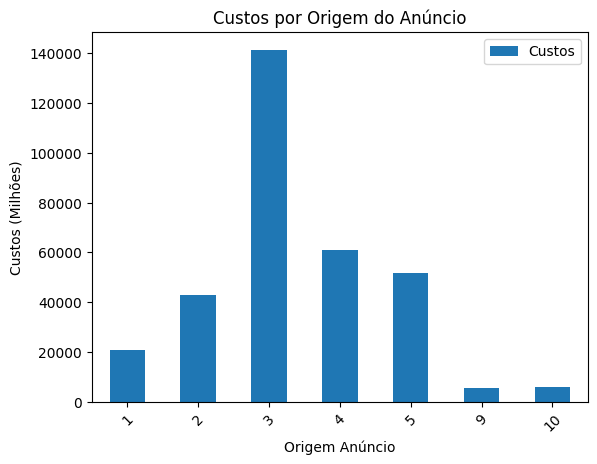

In [241]:
#Criando um gráfico de barras para melhor visualização do custo por origem de anúncio
pd.options.display.float_format = '{:.2f}'.format
costs_per_chanel= df_costs.groupby('source_id')['costs'].sum().reset_index()
costs_per_chanel.plot(kind='bar', x='source_id',title= 'Custos por Origem do Anúncio',
                   xlabel= 'Origem Anúncio', ylabel= 'Custos (Milhões)',rot= 45,legend= False)
plt.legend(['Custos'])
plt.show()


In [242]:
#Nesta célula vou criar uma tabela mostrando a receita e o dinheiro investido em cada origem de anúncio.
table= pd.merge(costs_per_chanel, rec_per_chanel, left_on= 'source_id', right_on='source_id',how='inner' )
table.drop(columns=['source_id'], inplace=True)
table

,costs,revenue
0,20833.27,2298200.17
1,42806.04,2638189.21
2,141321.63,296687.96
3,61073.60,496690.17
4,51757.10,1181477.14
5,5517.49,36342.25
6,5822.49,14619.23


In [243]:
# Nesta célula irei criar uma coluna com as diferenças entre receita e custos dos anúncios
table['dif']= table['revenue'] - table['costs']
table

,costs,revenue,dif
0,20833.27,2298200.17,2277366.90
1,42806.04,2638189.21,2595383.17
2,141321.63,296687.96,155366.33
3,61073.60,496690.17,435616.57
4,51757.10,1181477.14,1129720.04
5,5517.49,36342.25,30824.76
6,5822.49,14619.23,8796.74


* Na célula acima podemos notar que nenhum anúncio deu prejuízo para a empresa, ou seja, teve uma receita gerada menor do que o custo investido no anúncio.
* Essa métrica também nos diz que o investimento valeu a pena.

In [244]:
df_orders.head()

,buy_ts,revenue,uid
0,2017-06-01 00:10:00,17.00,10329302124590727494
1,2017-06-01 00:25:00,0.55,11627257723692907447
2,2017-06-01 00:27:00,0.37,17903680561304213844
3,2017-06-01 00:29:00,0.55,16109239769442553005
4,2017-06-01 07:58:00,0.37,14200605875248379450


In [245]:
# Calculando o primeiro pedido de cada usuário e extraindo o mês.

first_orders = df_orders.groupby('uid').agg({'buy_ts': "min"}).reset_index().rename(columns={"buy_ts": 'first_purchases'})
first_orders['first_purchase_month'] = first_orders['first_purchases'].dt.to_period("M")
first_orders.head()

,uid,first_purchases,first_purchase_month
0,313578113262317,2018-01-03 21:51:00,2018-01
1,1575281904278712,2017-06-03 10:13:00,2017-06
2,2429014661409475,2017-10-11 18:33:00,2017-10
3,2464366381792757,2018-01-28 15:54:00,2018-01
4,2551852515556206,2017-11-24 10:14:00,2017-11


In [246]:
df_visits.head()

,device,end_ts,source_id,start_ts,uid,month,week,day,date,duration_session,start_ts_date
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062,12,51,20,2017-12-20,1080,2017-12-20
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740,2,8,19,2018-02-19,1680,2018-02-19
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527,7,26,1,2017-07-01,0,2017-07-01
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214,5,20,20,2018-05-20,1440,2018-05-20
4,desktop,2017-12-27 14:06:00,3,2017-12-27 14:06:00,9969694820036681168,12,52,27,2017-12-27,0,2017-12-27


In [247]:
#Faça o merge entre o primeiro pedido e os dados de source pelo ID.
user_source = df_visits[['uid', 'source_id']].drop_duplicates()
first_orders = pd.merge(first_orders, user_source, on= 'uid')
first_orders.head()

,uid,first_purchases,first_purchase_month,source_id
0,313578113262317,2018-01-03 21:51:00,2018-01,2
1,1575281904278712,2017-06-03 10:13:00,2017-06,10
2,2429014661409475,2017-10-11 18:33:00,2017-10,3
3,2464366381792757,2018-01-28 15:54:00,2018-01,5
4,2551852515556206,2017-11-24 10:14:00,2017-11,5


In [248]:
df_orders.head()

,buy_ts,revenue,uid
0,2017-06-01 00:10:00,17.00,10329302124590727494
1,2017-06-01 00:25:00,0.55,11627257723692907447
2,2017-06-01 00:27:00,0.37,17903680561304213844
3,2017-06-01 00:29:00,0.55,16109239769442553005
4,2017-06-01 07:58:00,0.37,14200605875248379450


In [249]:
# Criando a coluna month no df_orders
df_orders['month'] = df_orders['buy_ts'].dt.to_period("M")  
df_orders.head()

,buy_ts,revenue,uid,month
0,2017-06-01 00:10:00,17.00,10329302124590727494,2017-06
1,2017-06-01 00:25:00,0.55,11627257723692907447,2017-06
2,2017-06-01 00:27:00,0.37,17903680561304213844,2017-06
3,2017-06-01 00:29:00,0.55,16109239769442553005,2017-06
4,2017-06-01 07:58:00,0.37,14200605875248379450,2017-06


In [250]:
#Calculando a receita mensal e fazendo o merge com a tabela criada anteriormente.

revenue_df = df_orders.groupby(['uid', 'month']).agg({'revenue': 'sum'}).reset_index()
buyers = first_orders.merge(revenue_df, on='uid', how= 'left')
buyers.head()

,uid,first_purchases,first_purchase_month,source_id,month,revenue
0,313578113262317,2018-01-03 21:51:00,2018-01,2,2018-01,0.55
1,1575281904278712,2017-06-03 10:13:00,2017-06,10,2017-06,3.05
2,2429014661409475,2017-10-11 18:33:00,2017-10,3,2017-10,73.33
3,2464366381792757,2018-01-28 15:54:00,2018-01,5,2018-01,2.44
4,2551852515556206,2017-11-24 10:14:00,2017-11,5,2017-11,10.99


In [251]:
buyers.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 69943 entries, 0 to 69942
Data columns (total 6 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   uid                   69943 non-null  uint64        
 1   first_purchases       69943 non-null  datetime64[ns]
 2   first_purchase_month  69943 non-null  period[M]     
 3   source_id             69943 non-null  int64         
 4   month                 69943 non-null  period[M]     
 5   revenue               69943 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(1), period[M](2), uint64(1)
memory usage: 3.7 MB


In [252]:
#Calculando a receita e os custos.

revenue_grouped_df = buyers.groupby(['source_id', 'month']).agg({'revenue': 'sum'}).reset_index()
costs_grouped_df = df_costs.groupby(['source_id','month']).agg({'costs': 'sum'}).reset_index()

In [253]:
costs_grouped_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84 entries, 0 to 83
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype    
---  ------     --------------  -----    
 0   source_id  84 non-null     int64    
 1   month      84 non-null     period[M]
 2   costs      84 non-null     float64  
dtypes: float64(1), int64(1), period[M](1)
memory usage: 2.1 KB


In [254]:
costs_grouped_df.head()

,source_id,month,costs
0,1,2017-06,1125.61
1,1,2017-07,1072.88
2,1,2017-08,951.81
3,1,2017-09,1502.01
4,1,2017-10,2315.75


In [255]:
revenue_grouped_df.head()

,source_id,month,revenue
0,1,2017-06,2563.84
1,1,2017-07,3947.25
2,1,2017-08,3325.64
3,1,2017-09,8193.42
4,1,2017-10,11466.14


In [260]:
# Gerando um dataframe por source e month com os dados de receita e custo.
df = pd.merge(costs_grouped_df, revenue_grouped_df, left_on=['source_id','month'], right_on= ['source_id','month'])
df.head()

,source_id,month,costs,revenue
0,1,2017-06,1125.61,2563.84
1,1,2017-07,1072.88,3947.25
2,1,2017-08,951.81,3325.64
3,1,2017-09,1502.01,8193.42
4,1,2017-10,2315.75,11466.14


In [261]:
# Calculando o lucro para gerar o ROMI
df['profit']= df['revenue'] - df['costs']
df.head()


,source_id,month,costs,revenue,profit
0,1,2017-06,1125.61,2563.84,1438.23
1,1,2017-07,1072.88,3947.25,2874.37
2,1,2017-08,951.81,3325.64,2373.83
3,1,2017-09,1502.01,8193.42,6691.41
4,1,2017-10,2315.75,11466.14,9150.39


In [262]:
# Nesta célula foi calculado o ROMI ao invés do ROI, visto que, para o roi precisamos do lucro líquido,
# e para o romi precisamos do lucro bruto.
df['romi %']= (df['profit'] - df['costs']) / df['costs'] * 100
df.head()


,source_id,month,costs,revenue,profit,romi %
0,1,2017-06,1125.61,2563.84,1438.23,27.77
1,1,2017-07,1072.88,3947.25,2874.37,167.91
2,1,2017-08,951.81,3325.64,2373.83,149.40
3,1,2017-09,1502.01,8193.42,6691.41,345.50
4,1,2017-10,2315.75,11466.14,9150.39,295.14


In [263]:
# Nesta célula podemos notar qual canal de origem da o melhor retorno e aqueles que também dão prejuízo para a empresa.
df.groupby('source_id')['romi %'].sum().reset_index()


,source_id,romi %
0,1,3216.98
1,2,666.18
2,3,-1416.24
3,4,-152.03
4,5,114.77
5,9,1710.31
6,10,-646.52


In [264]:
# 0) Calculando o custo por origem.
expense_per_source = df_costs.groupby('source_id').agg({'costs':'sum'}).reset_index()
expense_per_source.head()

,source_id,costs
0,1,20833.27
1,2,42806.04
2,3,141321.63
3,4,61073.60
4,5,51757.10


In [265]:
# 1) Calculando o número de usuários por origem.
group_size = df_visits.groupby('source_id').agg({'uid': 'nunique'}).reset_index()
group_size.columns = ['source_id', 'n_visitors']
group_size.head()

,source_id,n_visitors
0,1,18999
1,2,26245
2,3,74756
3,4,83525
4,5,56974


In [266]:
# 2) Calculando o CAC por origem.
cac_report = group_size.join(expense_per_source['costs'], how='left', on = 'source_id')
cac_report['cac'] = cac_report['costs'] / cac_report['n_visitors']
cac_report.head()

,source_id,n_visitors,costs,cac
0,1,18999,42806.04,2.25
1,2,26245,141321.63,5.38
2,3,74756,61073.60,0.82
3,4,83525,51757.10,0.62
4,5,56974,5517.49,0.10


In [269]:
df_orders['cohort']= df_orders.groupby('uid')['buy_ts'].transform('min').dt.to_period('M')

In [270]:
# Calculando a receita e o número de compradores
df_revenue_per_cohort_month= df_orders.groupby(['month','cohort']).agg(revenue= ('revenue','sum'), n_buyers= ('uid', 'nunique')).reset_index()
#df_revenue_per_cohort_month['month']= pd.to_datetime(df_revenue_per_cohort_month['month']).dt.to_period('M')
df_revenue_per_cohort_month.head()

,month,cohort,revenue,n_buyers
0,2017-06,2017-06,9557.49,2023
1,2017-07,2017-06,981.82,61
2,2017-07,2017-07,11557.65,1923
3,2017-08,2017-06,885.34,50
4,2017-08,2017-07,644.61,52


In [271]:
# Calculando o custo por mês
cost_per_month= df_costs.groupby('month').agg(costs= ('costs','sum')).reset_index()
cost_per_month.head()

,month,costs
0,2017-06,18015.00
1,2017-07,18240.59
2,2017-08,14790.54
3,2017-09,24368.91
4,2017-10,36322.88


In [272]:
# Adicionando os custos ao df com a cohort, a receita, e o número de compradores.
cost_revenue_per_cohort_month= pd.merge(df_revenue_per_cohort_month, cost_per_month, on='month')
cost_revenue_per_cohort_month.head()

,month,cohort,revenue,n_buyers,costs
0,2017-06,2017-06,9557.49,2023,18015.00
1,2017-07,2017-06,981.82,61,18240.59
2,2017-07,2017-07,11557.65,1923,18240.59
3,2017-08,2017-06,885.34,50,14790.54
4,2017-08,2017-07,644.61,52,14790.54


In [273]:
# Calculando o CAC por mês e cohort
cost_revenue_per_cohort_month['cac']=  cost_revenue_per_cohort_month['costs'] / cost_revenue_per_cohort_month['n_buyers']
cost_revenue_per_cohort_month.head()

,month,cohort,revenue,n_buyers,costs,cac
0,2017-06,2017-06,9557.49,2023,18015.00,8.91
1,2017-07,2017-06,981.82,61,18240.59,299.03
2,2017-07,2017-07,11557.65,1923,18240.59,9.49
3,2017-08,2017-06,885.34,50,14790.54,295.81
4,2017-08,2017-07,644.61,52,14790.54,284.43


In [274]:
# Calculando o LTV
cost_revenue_per_cohort_month['ltv']= cost_revenue_per_cohort_month['revenue'] / cost_revenue_per_cohort_month['n_buyers']
cost_revenue_per_cohort_month.head()

,month,cohort,revenue,n_buyers,costs,cac,ltv
0,2017-06,2017-06,9557.49,2023,18015.00,8.91,4.72
1,2017-07,2017-06,981.82,61,18240.59,299.03,16.10
2,2017-07,2017-07,11557.65,1923,18240.59,9.49,6.01
3,2017-08,2017-06,885.34,50,14790.54,295.81,17.71
4,2017-08,2017-07,644.61,52,14790.54,284.43,12.40


In [275]:
# Calculando o ROMI
cost_revenue_per_cohort_month['romi']= cost_revenue_per_cohort_month['ltv'] / cost_revenue_per_cohort_month['cac']
cost_revenue_per_cohort_month.head()

,month,cohort,revenue,n_buyers,costs,cac,ltv,romi
0,2017-06,2017-06,9557.49,2023,18015.00,8.91,4.72,0.53
1,2017-07,2017-06,981.82,61,18240.59,299.03,16.10,0.05
2,2017-07,2017-07,11557.65,1923,18240.59,9.49,6.01,0.63
3,2017-08,2017-06,885.34,50,14790.54,295.81,17.71,0.06
4,2017-08,2017-07,644.61,52,14790.54,284.43,12.40,0.04


In [277]:
romi_pivot= cost_revenue_per_cohort_month.pivot_table(index='cohort', columns= 'month', 
                                                      values='romi', aggfunc='mean')
cum_sum_romi = romi_pivot.cumsum(axis=1).round(2)
cum_sum_romi.fillna('')

month,2017-06,2017-07,2017-08,2017-09,2017-10,2017-11,2017-12,2018-01,2018-02,2018-03,2018-04,2018-05
cohort,,,,,,,,,,,,
2017-06,0.53,0.58,0.64,0.72,0.78,0.82,0.87,0.90,0.94,0.98,1.03,1.05
2017-07,,0.63,0.68,0.73,0.75,0.75,0.76,0.77,0.78,0.79,0.80,0.81
2017-08,,,0.49,0.52,0.53,0.55,0.56,0.58,0.58,0.60,0.62,0.63
2017-09,,,,0.60,0.68,0.71,0.98,1.01,1.06,1.12,1.15,1.17
2017-10,,,,,0.60,0.66,0.68,0.70,0.72,0.74,0.76,0.78
2017-11,,,,,,0.55,0.60,0.62,0.66,0.68,0.69,0.71
2017-12,,,,,,,0.54,0.58,0.70,0.85,0.92,0.98
2018-01,,,,,,,,0.42,0.45,0.48,0.50,0.51
2018-02,,,,,,,,,0.46,0.50,0.51,0.52


In [278]:
buyers_per_month= df_orders.groupby('month').agg({'uid': 'nunique', 'revenue': 'sum'}).reset_index()
buyers_per_month.columns = ['month', 'n_buyers','revenue']
buyers_per_month.head()

,month,n_buyers,revenue
0,2017-06,2023,9557.49
1,2017-07,1984,12539.47
2,2017-08,1472,8758.78
3,2017-09,2750,18345.51
4,2017-10,4675,27987.70


In [279]:
# Calculando o total gasto para o CAC
tot_spen= df_costs['costs'].sum()
tot_spen

329131.62

In [280]:
# Nesta célula será calculado o CAC por origem.
users_by_orig= df_visits.groupby('source_id')['uid'].nunique()
CAC= tot_spen / users_by_orig
CAC

source_id
1       17.32
2       12.54
3        4.40
4        3.94
5        5.78
6    54855.27
7     9680.34
9       35.53
10      40.80
Name: uid, dtype: float64

In [281]:
# Nesta célula continuamos mostrando o quanto custou a aquisição de clientes por cada canal de origem
df_aux6.groupby('source_id')['custo_medio_por_usuario'].sum().reset_index()

,source_id,custo_medio_por_usuario
0,1,163171.93
1,2,229435.33
2,3,211393.87
3,4,73966.16
4,5,162092.98
5,6,0.00
6,7,0.00
7,9,7233.75
8,10,7124.12


In [282]:
df_aux6.head()

,device,end_ts,source_id,start_ts,uid,month,week,day,date,duration_session,start_ts_date,dt,costs,total_visits,custo_medio_por_usuario,buy_ts,revenue,ltv
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062,12,51,20,2017-12-20,1080,2017-12-20,NaT,NaN,NaN,0.00,NaT,0.00,0.00
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740,2,8,19,2018-02-19,1680,2018-02-19,NaT,NaN,NaN,0.00,NaT,0.00,0.00
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527,7,26,1,2017-07-01,0,2017-07-01,2017-07-01,72.99,144.00,0.51,NaT,0.00,-0.51
3,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527,7,26,1,2017-07-01,0,2017-07-01,2017-07-01,45.97,144.00,0.32,NaT,0.00,-0.32
4,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527,7,26,1,2017-07-01,0,2017-07-01,2017-07-01,107.34,144.00,0.75,NaT,0.00,-0.75


In [283]:
# Nesta célula crei uma proporção para mostrar que quase 93% da receita é gerada pelo dispositivo desktop
df_rec= df_aux6.groupby('device')['revenue'].sum().reset_index()
df_rec['proporção']=  df_rec['revenue'] / df_rec['revenue'].sum() * 100
df_rec

,device,revenue,proporção
0,desktop,11568143.28,92.79
1,touch,898826.98,7.21


<AxesSubplot:title={'center':'Receita por Dispositivo'}, xlabel='0 = Desktop  / 1 = Touch'>

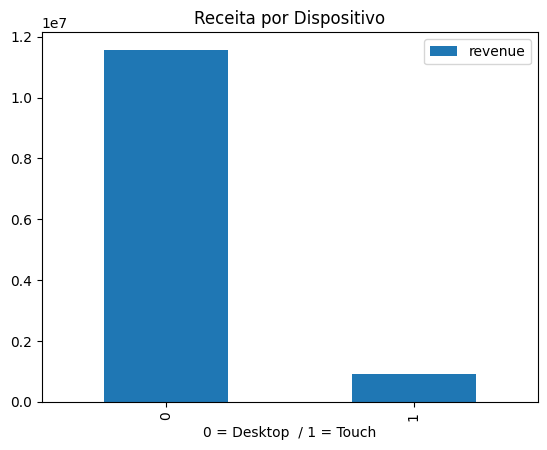

In [284]:
# Nesta célula coloquei a informação da proporção de cada receita em um gráfico para melhor visualização
df_aux6.groupby('device')['revenue'].sum().reset_index().plot(kind='bar', 
                                                              title='Receita por Dispositivo',
                                                             xlabel= '0 = Desktop  / 1 = Touch')

In [285]:
# Filtrando o df para mostrar qual origem tem a maior receita para desktop
df_disp= df_aux6.groupby(['device','source_id'])['revenue'].sum().reset_index().sort_values(by= 'revenue', ascending= False)
df_disp[df_disp['device'] == 'desktop']


,device,source_id,revenue
0,desktop,1,4158400.51
1,desktop,2,4156916.54
4,desktop,5,1957694.26
3,desktop,4,649986.86
2,desktop,3,541742.06
7,desktop,9,85270.59
8,desktop,10,18131.24
6,desktop,7,1.22
5,desktop,6,0.00


<AxesSubplot:title={'center':'Receita x Origem x Dispositivo'}, xlabel='Canais de Origem', ylabel='Receita dos Dispositivos Desktop'>

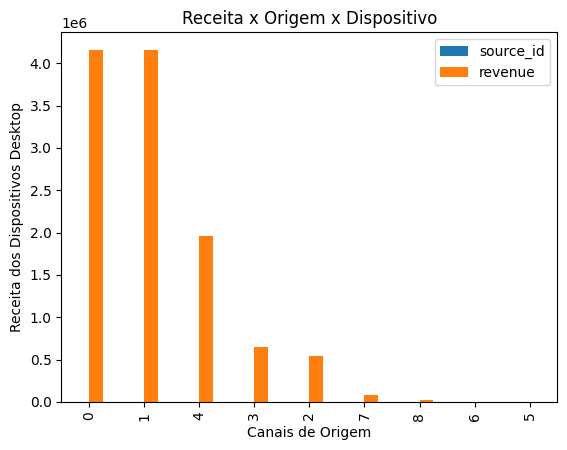

In [286]:
# Colocando a informação sobre receita e dispositivo desktop em um gráfico para melhor visualização
df_disp[df_disp['device'] == 'desktop'].plot(kind='bar', title= 'Receita x Origem x Dispositivo',
                                            xlabel= 'Canais de Origem',
                                            ylabel= 'Receita dos Dispositivos Desktop')

In [287]:
# Nesta célula criei a proporção entre custo de aquisição de clientes e receita por origem
df_rec_cust= df_aux6.groupby('source_id')[['custo_medio_por_usuario','revenue']].sum().reset_index()
df_rec_cust['proporção %']= df_rec_cust['custo_medio_por_usuario'] / df_rec_cust['revenue'] * 100
df_rec_cust.sort_values(by= 'proporção %')

,source_id,custo_medio_por_usuario,revenue,proporção %
6,7,0.00,1.22,0.00
0,1,163171.93,4458527.25,3.66
1,2,229435.33,4491097.15,5.11
7,9,7233.75,93662.07,7.72
4,5,162092.98,1996480.11,8.12
3,4,73966.16,814376.51,9.08
8,10,7124.12,24353.44,29.25
2,3,211393.87,588472.51,35.92
5,6,0.00,0.00,NaN


## Conclusão:
* A plataforma que mais gera receita para a empresa é a número 2.
* A plataforma que mais gera custo por usuário é a número 3.
* Contudo a  melhor plataforma para a empresa em termos de custo benefício é a plataforma número 1, ou seja, é plataforma que tem a menor  proporção entre o custo de aquisição dos clientes e a receita que esses mesmos clientes geram, sendo assim, é a plataforma que mais vale a pena investir dinheiro.
* Aproximadamente 93% da receita é proveniente de desktop.
